<a href="https://colab.research.google.com/github/sudev-das-p/Customer-Concersion-Prediction/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np # For mathematical calculations 
import seaborn as sns # For data visualization 
import matplotlib.pyplot as plt # For plotting graphs
%matplotlib inline
import warnings # To ignore any warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('train (1).csv')

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [4]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [6]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [7]:
df.duplicated().sum() #there are 10 duplicate rows in the data

6

In [8]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


# Age

In [9]:
df.age.isnull().sum()

0

In [10]:
df.age.describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [11]:
df.age.nunique()

77

# Job


In [12]:
df.job

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45205, dtype: object

In [13]:
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [14]:
df.job.isnull().sum()

0

In [15]:
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [16]:
df.job = df.job.replace('unknown','blue-collar')

In [17]:
df.job

0          management
1          technician
2        entrepreneur
3         blue-collar
4         blue-collar
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45205, dtype: object

## **Marital Status**

In [18]:
df.marital

0         married
1          single
2         married
3         married
4          single
           ...   
45206     married
45207    divorced
45208     married
45209     married
45210     married
Name: marital, Length: 45205, dtype: object

In [19]:
df.marital.isnull().sum()

0

In [20]:
df.marital.value_counts(normalize = True)

married     0.601925
single      0.282889
divorced    0.115186
Name: marital, dtype: float64

From the above code it can be inferred that around 60% of dataset are married customers, 28% single and 11.5% divorced


## **Educational Qual**

In [21]:
df.education_qual

0         tertiary
1        secondary
2        secondary
3          unknown
4          unknown
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: education_qual, Length: 45205, dtype: object

In [22]:
df.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [23]:
df['education_qual'].replace('unknown', df['education_qual'].mode()[0], inplace=True)


## **Call Type**

In [24]:
df.call_type

0          unknown
1          unknown
2          unknown
3          unknown
4          unknown
           ...    
45206     cellular
45207     cellular
45208     cellular
45209    telephone
45210     cellular
Name: call_type, Length: 45205, dtype: object

In [25]:
df.call_type.value_counts(normalize = True)

cellular     0.647760
unknown      0.287955
telephone    0.064285
Name: call_type, dtype: float64

## **Day**

In [26]:
df.day

0         5
1         5
2         5
3         5
4         5
         ..
45206    17
45207    17
45208    17
45209    17
45210    17
Name: day, Length: 45205, dtype: int64

In [27]:
df.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

### **Month**

In [28]:
df.mon

0        may
1        may
2        may
3        may
4        may
        ... 
45206    nov
45207    nov
45208    nov
45209    nov
45210    nov
Name: mon, Length: 45205, dtype: object

In [29]:
df.mon.value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [30]:
df.mon.isnull().sum()

0

## **Duration**

In [31]:
df.dur

0         261
1         151
2          76
3          92
4         198
         ... 
45206     977
45207     456
45208    1127
45209     508
45210     361
Name: dur, Length: 45205, dtype: int64

In [32]:
df[df['dur']==0]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6424,53,management,married,primary,unknown,27,may,0,4,unknown,no
22937,35,technician,married,secondary,cellular,26,aug,0,15,unknown,no
36425,31,entrepreneur,married,secondary,cellular,11,may,0,2,unknown,no


In [33]:
df.dur.nunique()

1573

In [34]:
df.dur.isnull().sum()

0

## **Number of calls**

In [35]:
df.num_calls

0        1
1        1
2        1
3        1
4        1
        ..
45206    3
45207    2
45208    5
45209    4
45210    2
Name: num_calls, Length: 45205, dtype: int64

In [36]:
df.num_calls.nunique()

48

In [37]:
df.num_calls.value_counts()

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [38]:
df.num_calls.isnull().sum()

0

## **Previous Outcome**

In [39]:
df.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

the previous outcome for customers who recieved only one call should always be unknown 

In [40]:
df[df['num_calls']==1].prev_outcome

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
45197    unknown
45201    success
45202    unknown
45203    unknown
45204    failure
Name: prev_outcome, Length: 17542, dtype: object

In [41]:
df[df['num_calls']==1].shape[0]

17542

In [42]:
df[df['num_calls']==1].prev_outcome.value_counts()

unknown    13529
failure     2458
success      837
other        718
Name: prev_outcome, dtype: int64

In [43]:
df[df['num_calls']>1].prev_outcome.value_counts()

unknown    23424
failure     2443
other       1122
success      674
Name: prev_outcome, dtype: int64

## **y (Target Vector)**




In [44]:
df.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45205, dtype: object

In [45]:
df.y.value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [46]:
df.y.value_counts(normalize = True)

no     0.883
yes    0.117
Name: y, dtype: float64

<Axes: >

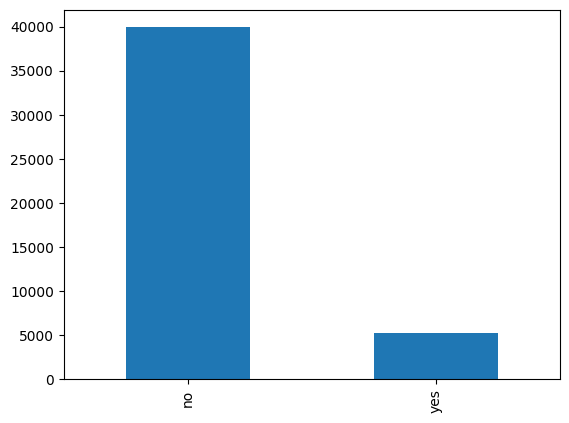

In [47]:
df.y.value_counts().plot.bar()

## ***EDA***

## categorical features (Univariate Analysis)

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')


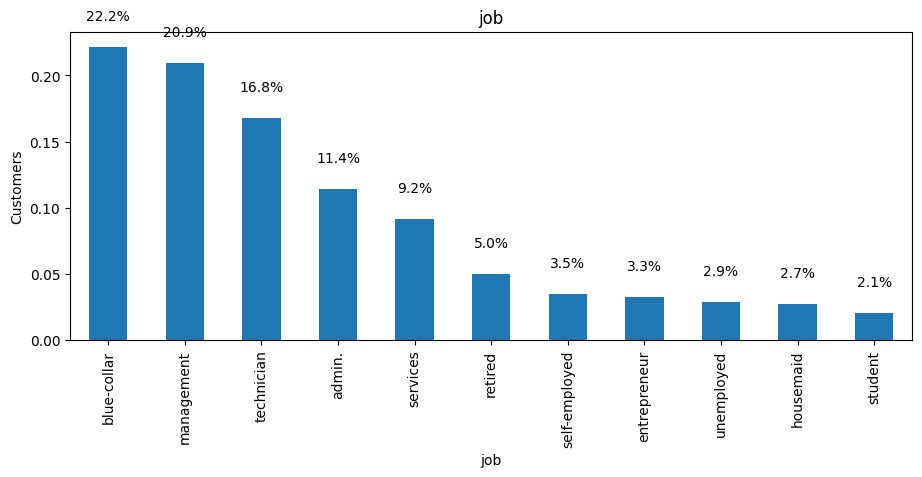

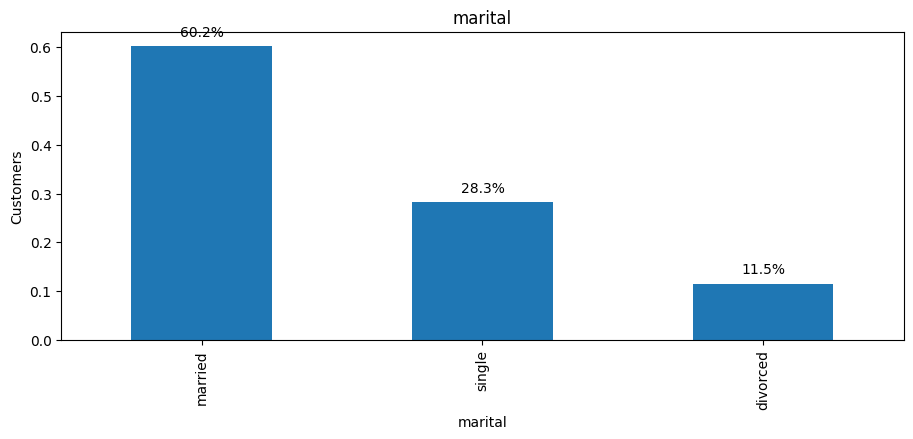

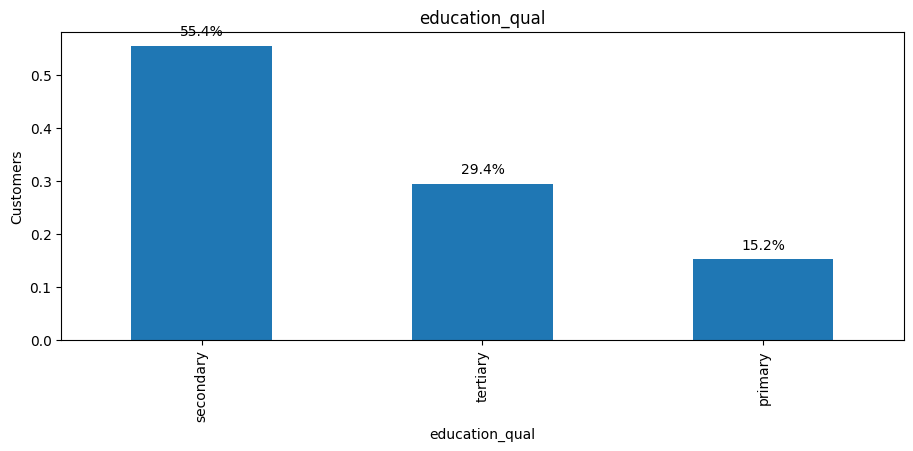

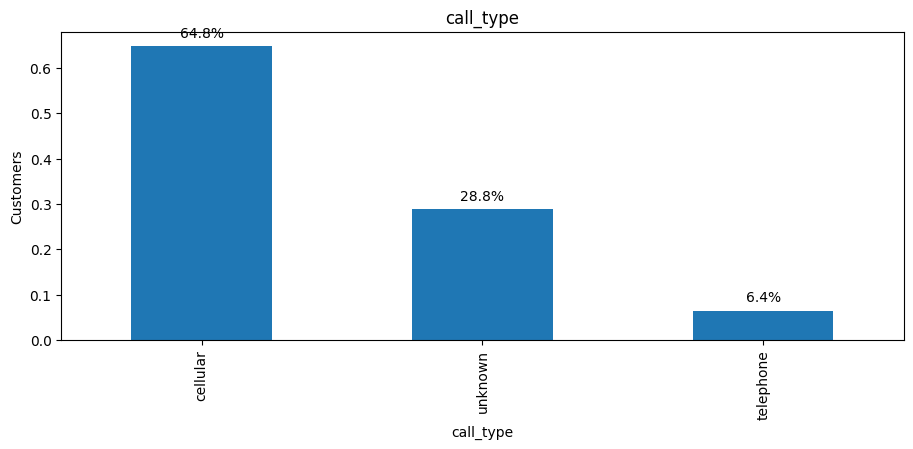

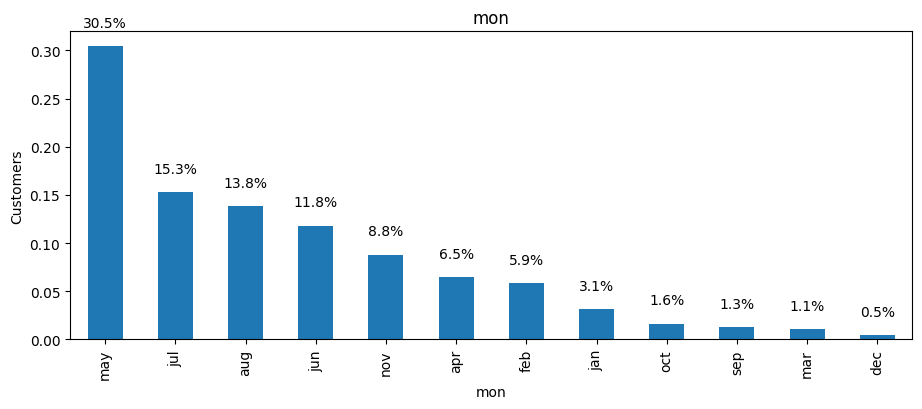

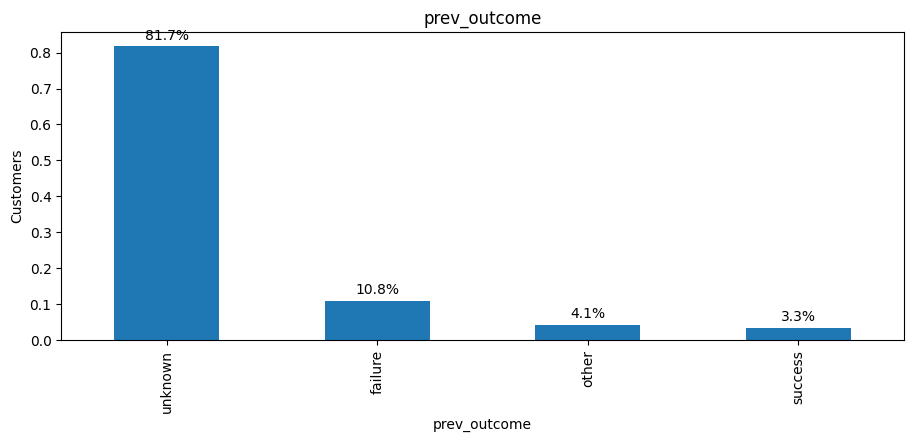

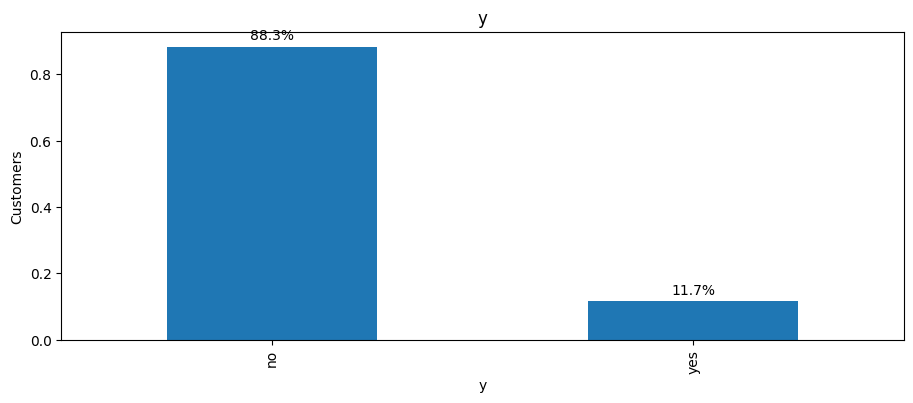

In [48]:
categorical= df.select_dtypes(include= ["object"]).columns
print(categorical)
for column in categorical:
  plt.figure(figsize=(50,4))
  ax = plt.subplot(141)
  df[column].value_counts(normalize = True).plot(kind = "bar")
  plt.xlabel(column)
  plt.ylabel("Customers")
  plt.title(column)
  for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.02, f"{p.get_height()*100:.1f}%", ha="center")

In [49]:
df['y'] = df['y'].map({'yes':1,'no':0})

Observations : 


*   The top proffesions that the customers belong to are blue-collar,management and technicians
*   Most of the employees are married(around 60%) 


*   Almost half the customers have seconadary educational qualification
*   Cellular type is most used contact type among customers

*   May is the month in which most number of customers were contacted
*   Only 3.3% of customers were successfully converted in the previous call

*   The target variable is imbalanced





















# Numerical Columns(Univariate Analysis)

In [50]:
numerical = df.select_dtypes(include = np.number)
numerical

,age,day,dur,num_calls,y
0,58,5,261,1,0
1,44,5,151,1,0
2,33,5,76,1,0
3,47,5,92,1,0
4,33,5,198,1,0
...,...,...,...,...,...
45206,51,17,977,3,1
45207,71,17,456,2,1
45208,72,17,1127,5,1
45209,57,17,508,4,0


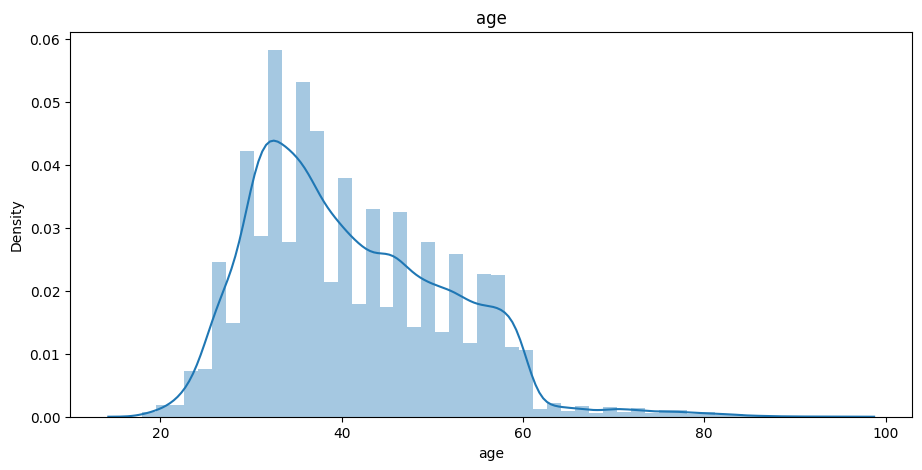

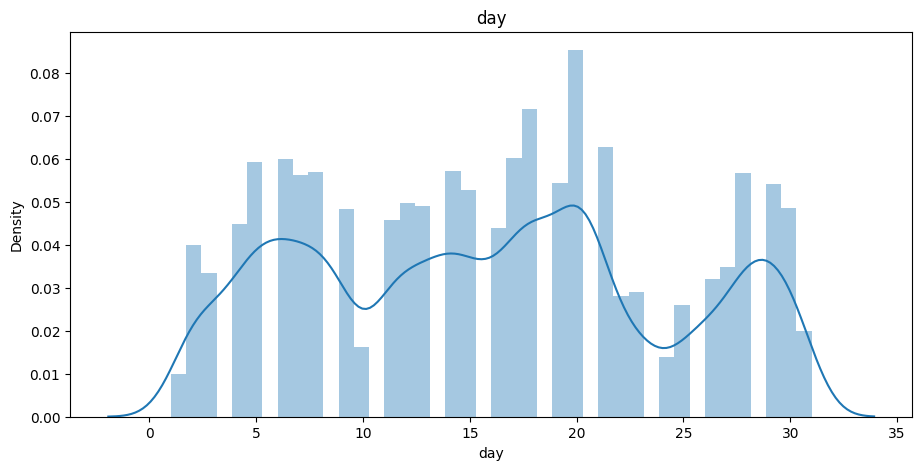

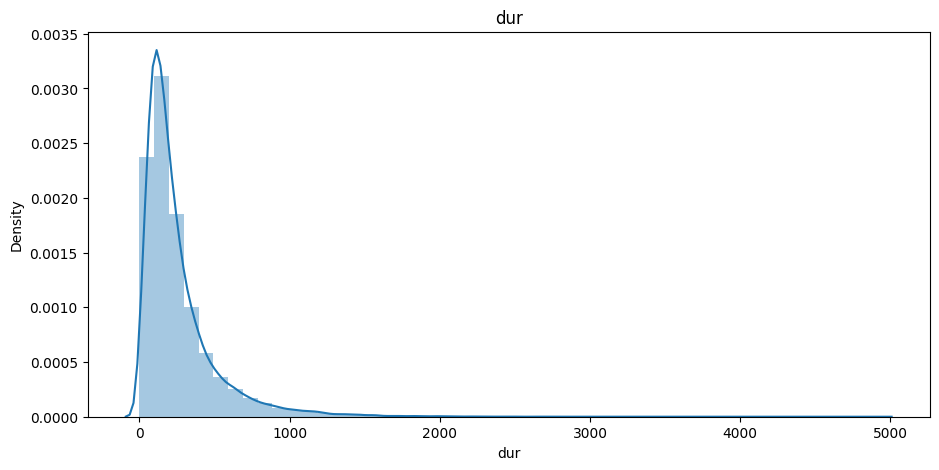

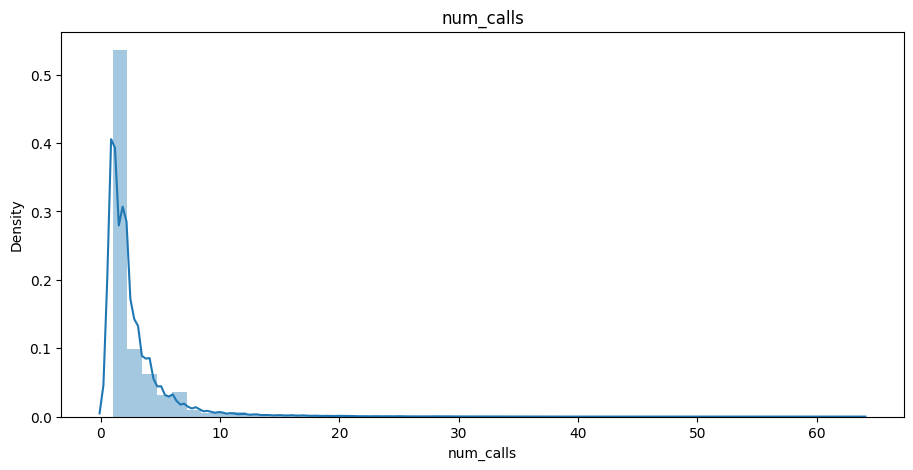

In [51]:
numerical.drop('y',axis=1,inplace = True)
for column in numerical:
  plt.figure(figsize=(50,5))
  plt.subplot(141)
  sns.distplot(df[column],kde = True)

  plt.title(column)

From the dist plots it is clear that features like age, call duration and number of calls are heavily skewed to the right. This might be due to the presence of outliers in this features. 


*   Company is targetting mostly middle aged people aged around 30 - 40
*   More number of people are contacted during middle of the month around 15 - 20

*   Most customers have received 1 or 2 calls.










## Bivariate Analysis of Categorical columns (count of customers)

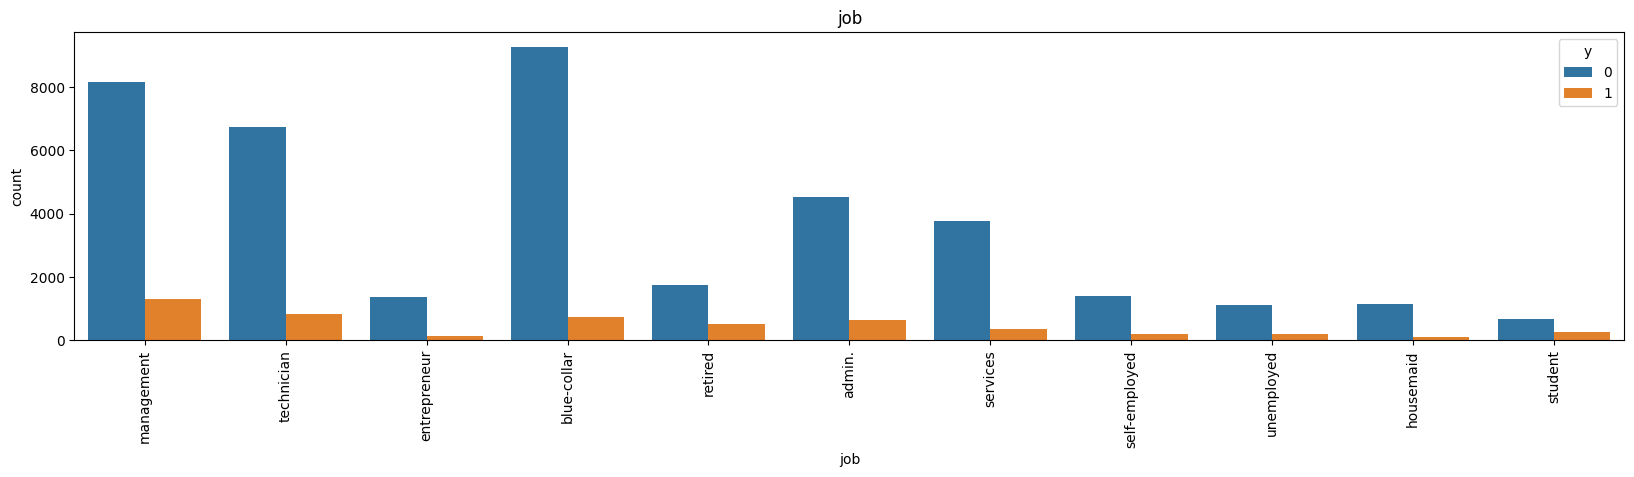

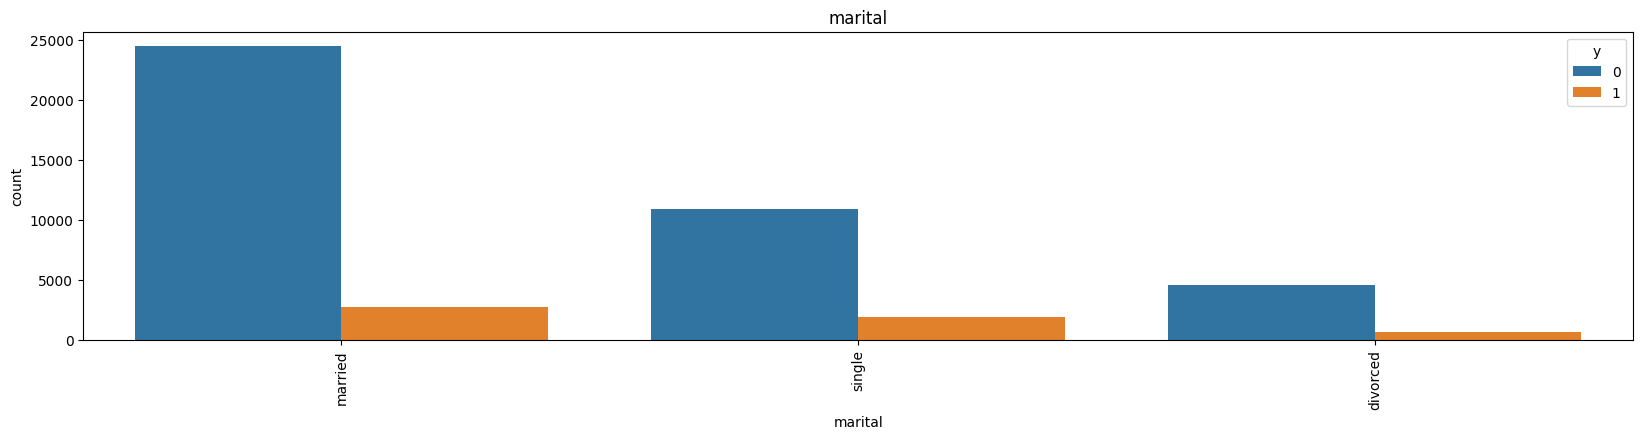

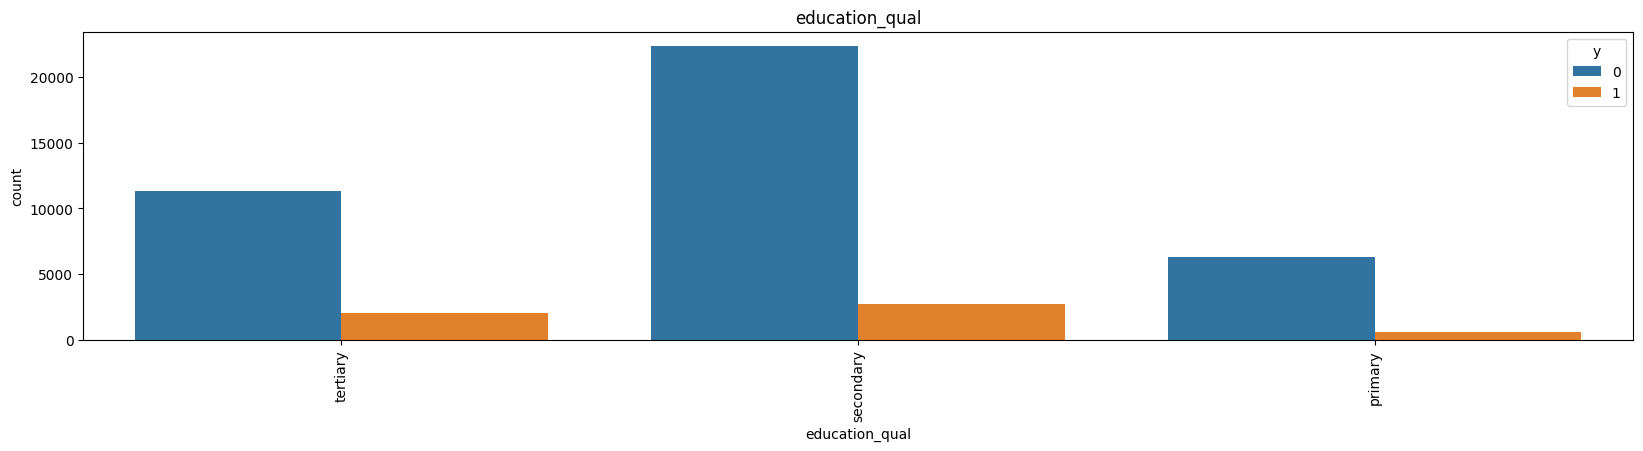

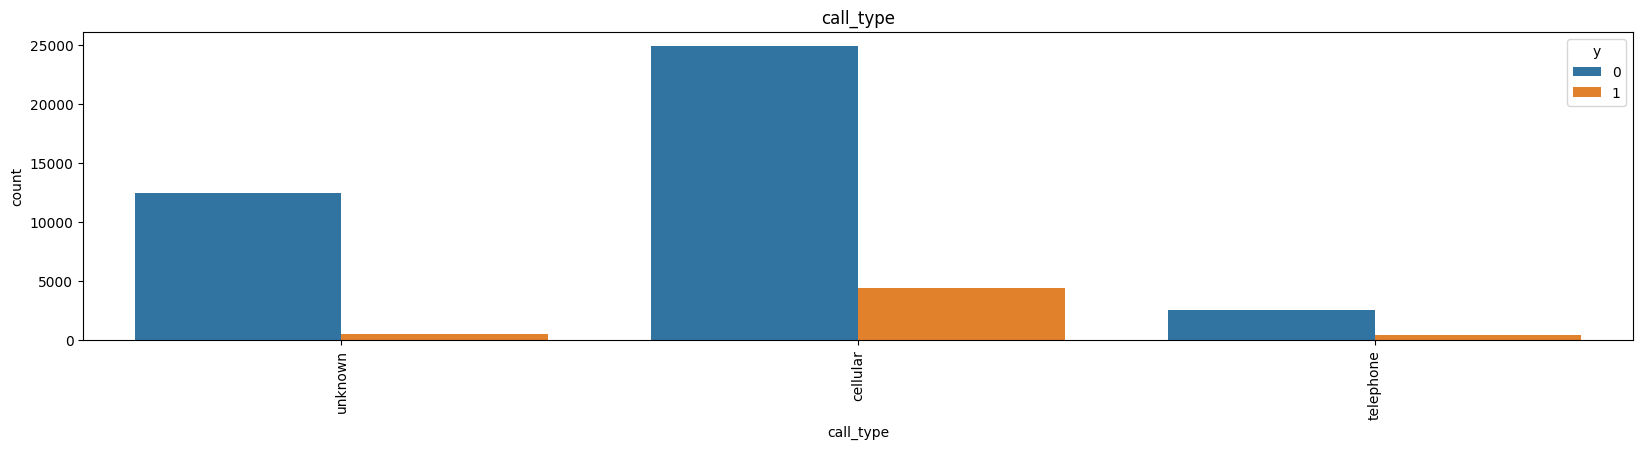

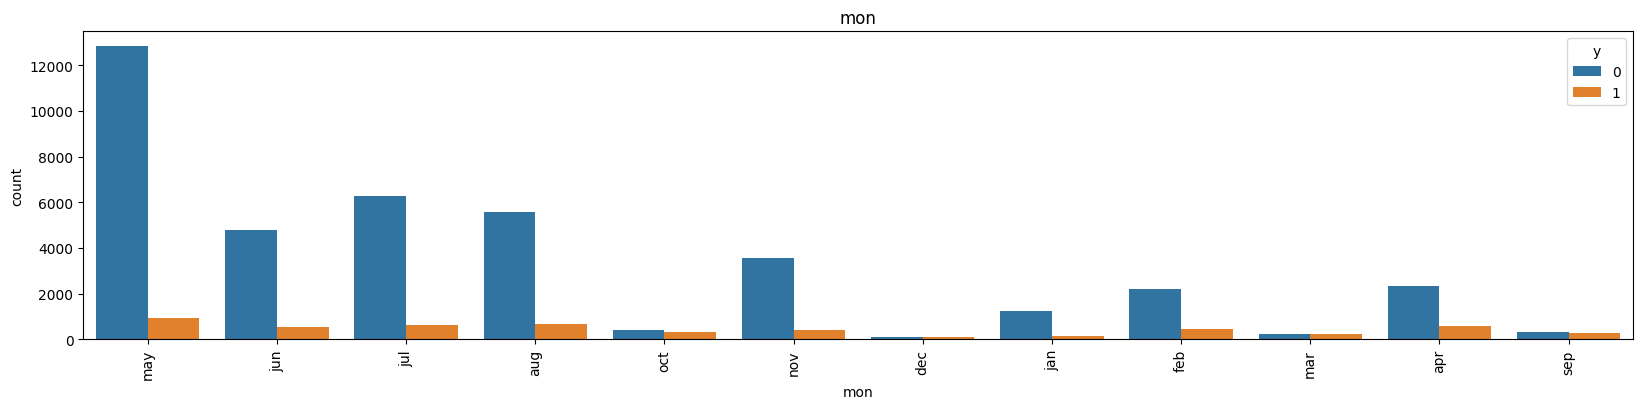

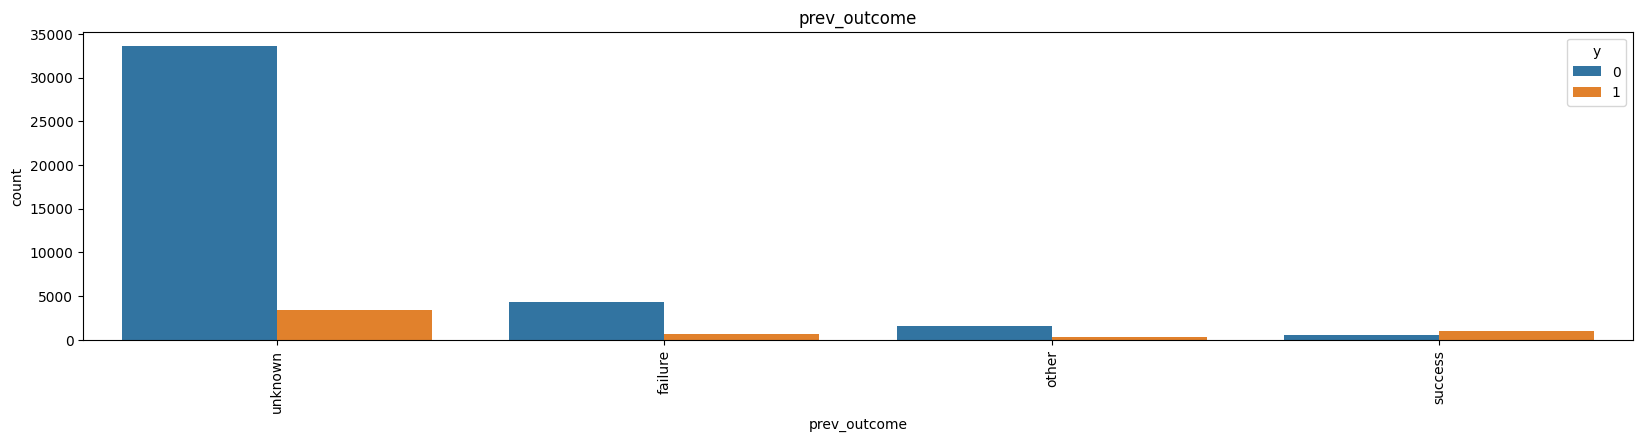

In [52]:
cat = categorical.drop('y')
for column in cat:
  plt.figure(figsize = (20,4))
  sns.countplot(x=column,hue = 'y',data = df)
  plt.title(column)
  plt.xticks(rotation = 90)



*   Customers with management job are converted most
*   Married customers are converted most

*   People with secondary educational qualification are converted most 
*   Cellular should be the preffered mode of communication since they are     converted most


*   May month have most of the people converted









## Bivariate Analysis of Categorical columns (% of customers)

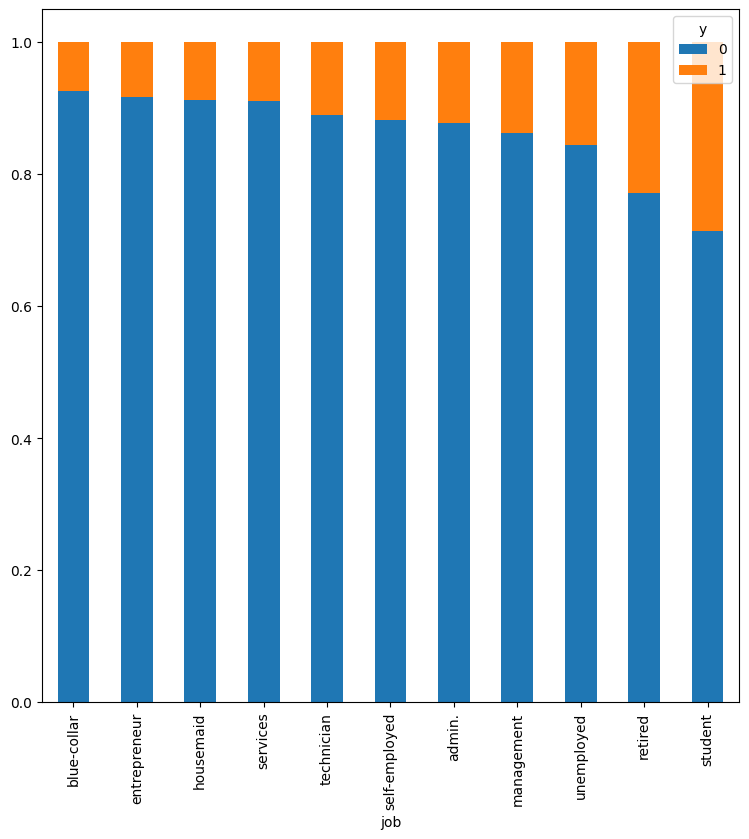

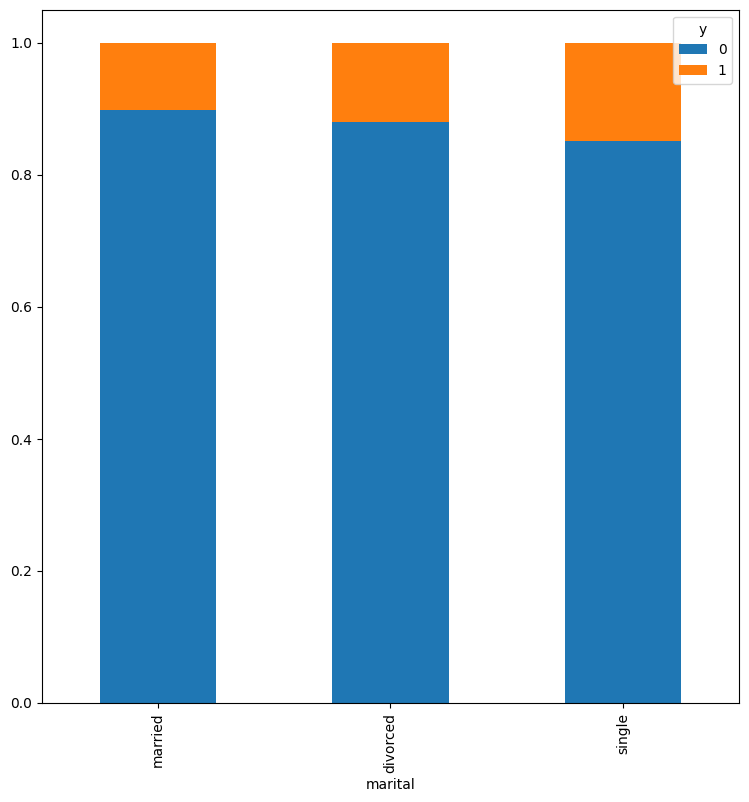

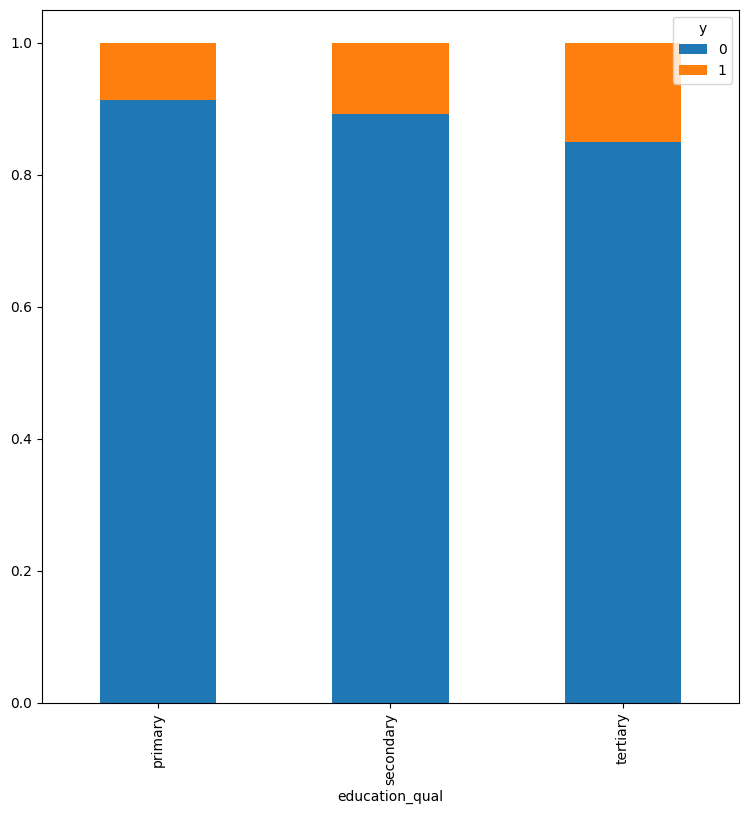

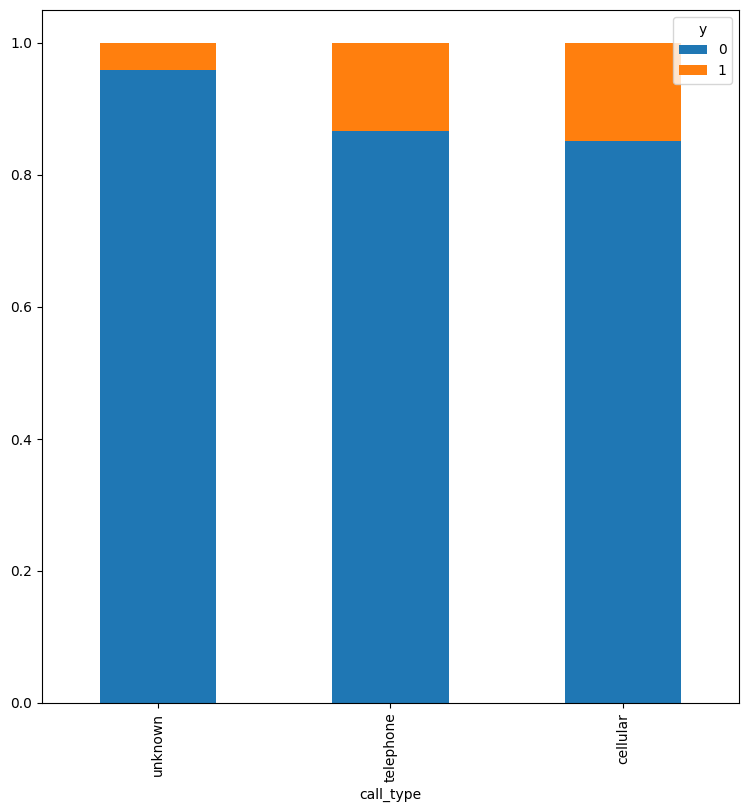

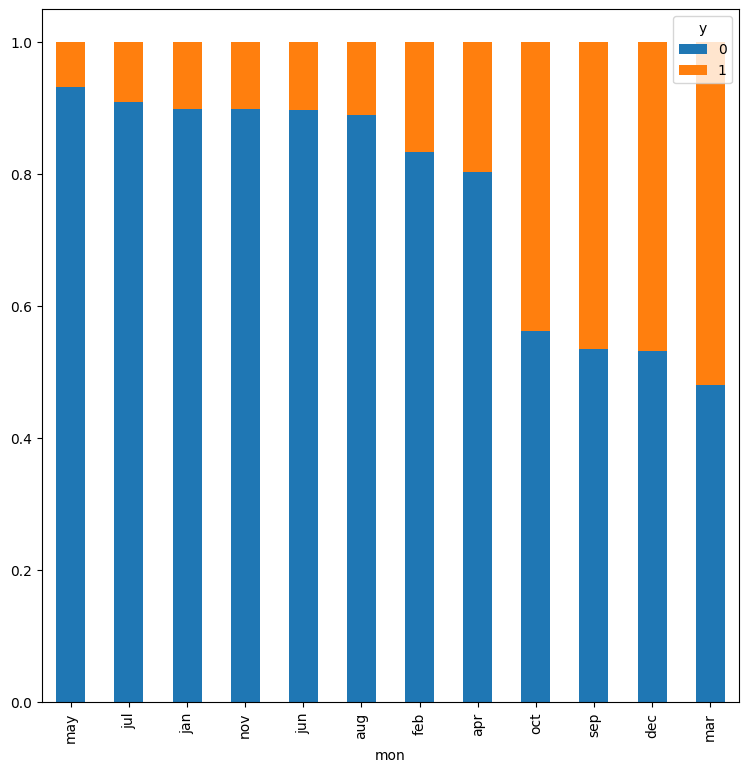

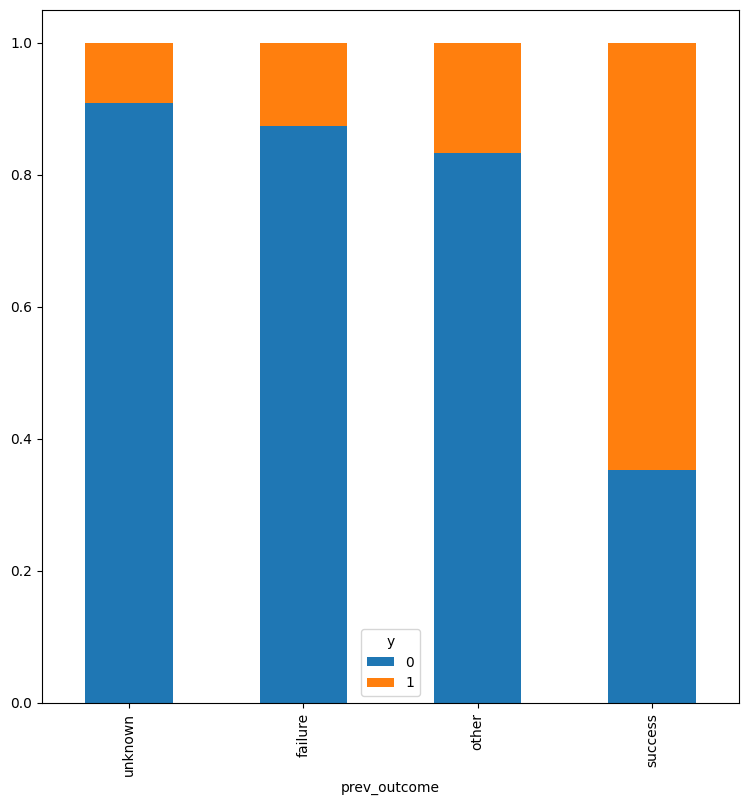

In [53]:
for column in cat:
  prop = pd.crosstab(df[column],df['y'])
  prop.div(prop.sum(1).astype(float),axis=0).sort_values(by=1).plot(kind = 'bar',stacked = True,figsize = (9,9))
   

**Job:-**

 Most converted by % : students

Least converted by % : blue-collar

 **Maritial Status:-**

 Most converted by % : single

Least converted by % : married

**Educational Qualification:-**

  Most converted by % : tertiary

 Least converted by % : primary

**Call Type:-**

  Most converted by % : Cellular

 Least converted by % : unknown

**Month:-**

  Most converted by % : March
  
 Least converted by % : May


## OBSERVATIONS

*   Customers whose previous outcome is positive has mostly been converted


*   Eventhough the company targets people with blue collar jobs, students are converted most
*   Customers who are single are more likely to convert


*   Though more customers are contacted in the month of May, people who has been contacted in the month of March has high conversion rate
*   Customers having tertiary education are more likely to convert
















# Handling Outliers


### Age

<Axes: >

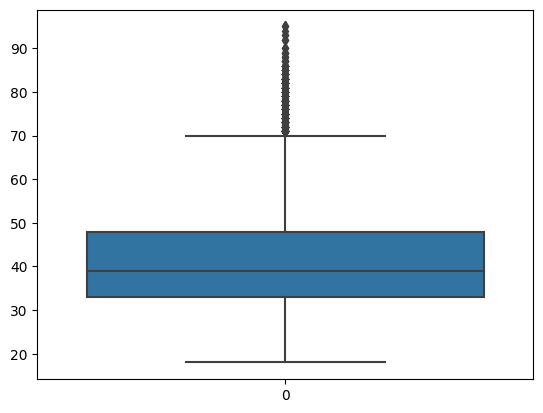

In [54]:
sns.boxplot(df['age'])

In [55]:
q1 = np.percentile(df['age'],25)
q3 = np.percentile(df['age'],75)
IQR = q3-q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR
print("upper:",upper,"  lower:",lower)

upper: 70.5   lower: 10.5


In [56]:
df['age'] = df.age.clip(10.5,70.5)

<Axes: >

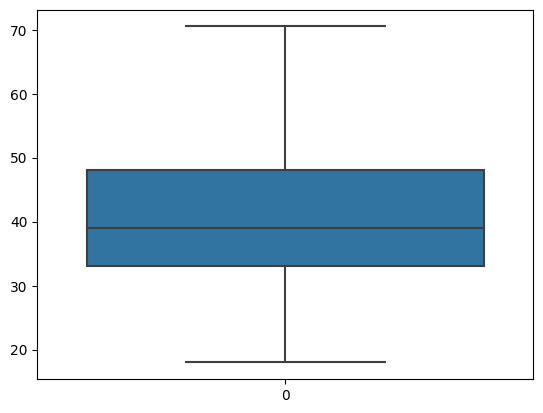

In [57]:
sns.boxplot(df.age)

### Call Duration

<Axes: >

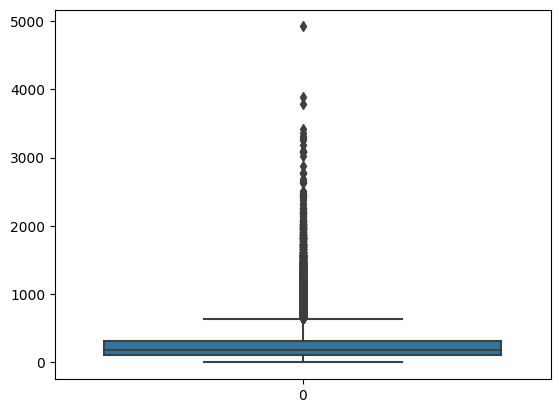

In [58]:
sns.boxplot(df.dur)

In [59]:
q1,q3 = np.percentile(df['dur'],[25,75])
IQR = q3-q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR
print("upper:",upper,"  lower:",lower)

upper: 643.0   lower: -221.0


In [60]:
df.dur = df.dur.clip(lower,upper)

<Axes: >

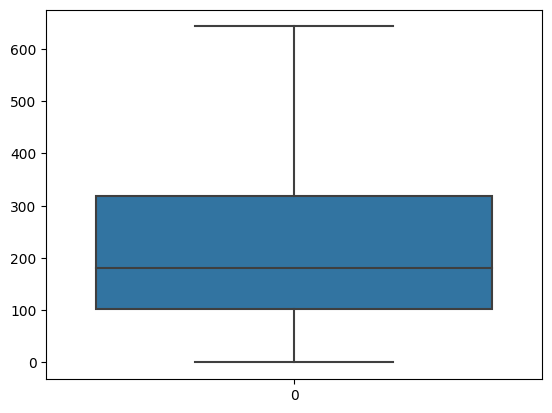

In [61]:
sns.boxplot(df.dur)

### Number of Calls

<Axes: >

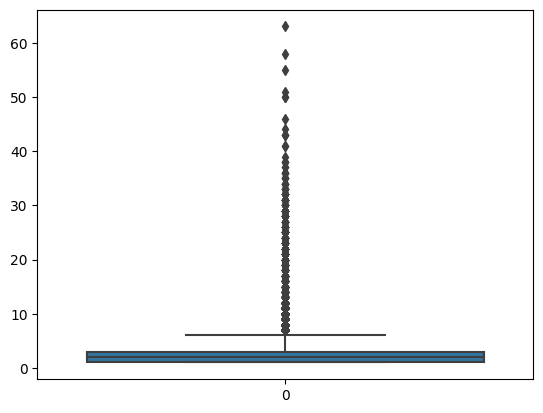

In [62]:
sns.boxplot(df.num_calls)

In [63]:
q1,q3 = np.percentile(df['num_calls'],[25,75])
IQR = q3-q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR
print("upper:",upper,"  lower:",lower)

upper: 6.0   lower: -2.0


In [64]:
df.num_calls = df.num_calls.clip(lower,upper)

<Axes: >

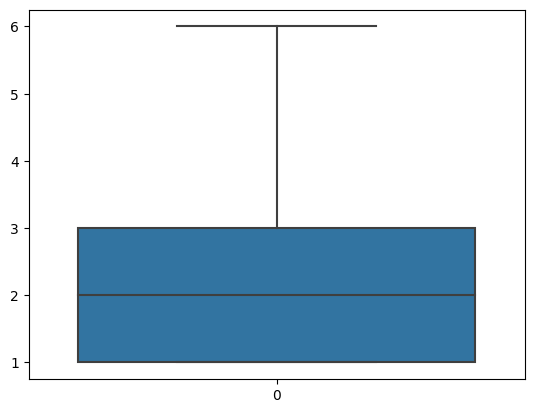

In [65]:
sns.boxplot(df.num_calls)

## **Encoding**

### Job

Since the insurance acceptance is affected by the job of the person we should do ordinal encoding

Encoding is done on the basis of percentage of people converted

In [66]:
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'housemaid':3,'services':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})   
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,married,tertiary,unknown,5,may,261,1,unknown,0
1,44.0,5,single,secondary,unknown,5,may,151,1,unknown,0
2,33.0,2,married,secondary,unknown,5,may,76,1,unknown,0
3,47.0,1,married,secondary,unknown,5,may,92,1,unknown,0
4,33.0,1,single,secondary,unknown,5,may,198,1,unknown,0


### Maritial Status

Doing ordinal encoding

In [67]:
df['marital'] = df['marital'].map({'married':1, 'divorced':2, 'single':3})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,tertiary,unknown,5,may,261,1,unknown,0
1,44.0,5,3,secondary,unknown,5,may,151,1,unknown,0
2,33.0,2,1,secondary,unknown,5,may,76,1,unknown,0
3,47.0,1,1,secondary,unknown,5,may,92,1,unknown,0
4,33.0,1,3,secondary,unknown,5,may,198,1,unknown,0


### Educational Qualification

In [68]:
df['education_qual'] = df['education_qual'].map({'primary':1, 'secondary':2, 'tertiary':3})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,unknown,5,may,261,1,unknown,0
1,44.0,5,3,2,unknown,5,may,151,1,unknown,0
2,33.0,2,1,2,unknown,5,may,76,1,unknown,0
3,47.0,1,1,2,unknown,5,may,92,1,unknown,0
4,33.0,1,3,2,unknown,5,may,198,1,unknown,0


### Call Type

In [69]:
df['call_type'] = df['call_type'].map({'unknown':1, 'telephone':2, 'cellular':3})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,1,5,may,261,1,unknown,0
1,44.0,5,3,2,1,5,may,151,1,unknown,0
2,33.0,2,1,2,1,5,may,76,1,unknown,0
3,47.0,1,1,2,1,5,may,92,1,unknown,0
4,33.0,1,3,2,1,5,may,198,1,unknown,0


### Month

In [70]:
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'sep' : 10 , 'dec': 11, 'mar': 12})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,1,5,1,261,1,unknown,0
1,44.0,5,3,2,1,5,1,151,1,unknown,0
2,33.0,2,1,2,1,5,1,76,1,unknown,0
3,47.0,1,1,2,1,5,1,92,1,unknown,0
4,33.0,1,3,2,1,5,1,198,1,unknown,0


In [71]:
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,1,5,1,261,1,1,0
1,44.0,5,3,2,1,5,1,151,1,1,0
2,33.0,2,1,2,1,5,1,76,1,1,0
3,47.0,1,1,2,1,5,1,92,1,1,0
4,33.0,1,3,2,1,5,1,198,1,1,0


# **Feature And Target Selection**

In [72]:
x = df.drop('y',axis = 1)
y = df['y']

# **Splitting**

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

# **Balancing**

In [74]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

# **Scaling**

In [75]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train_smt)
x_test = ss.transform(x_test)

# **MODELS**

## Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(x_train,y_train_smt)
lr.score(x_test,y_test)

0.7489215794712974

In [77]:
y_pred = lr.predict_proba(x_test)
y_pred

array([[0.15842597, 0.84157403],
       [0.10703653, 0.89296347],
       [0.93239071, 0.06760929],
       ...,
       [0.02669081, 0.97330919],
       [0.96380316, 0.03619684],
       [0.60516201, 0.39483799]])

In [78]:
log_auroc = roc_auc_score(y_test,y_pred[:,1])
log_auroc

0.895488539035204

## KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(x_train, y_train_smt) 
  print("K value :", i, "Train Score : ", knn.score(x_train,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test, y_test, cv=10)))
     

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8739089620104631
K value : 2 Train Score :  0.982331897495802 Cross Value Accuracy : 0.886959614726446
K value : 3 Train Score :  0.9638789515952398 Cross Value Accuracy : 0.8859641617366647
K value : 4 Train Score :  0.9598452215813682 Cross Value Accuracy : 0.8897243680633646
K value : 5 Train Score :  0.9513397094254217 Cross Value Accuracy : 0.8890605290177479
K value : 6 Train Score :  0.9497700226326933 Cross Value Accuracy : 0.8910521683860558
K value : 7 Train Score :  0.9442031101701103 Cross Value Accuracy : 0.8919366352124382
K value : 8 Train Score :  0.942560414689348 Cross Value Accuracy : 0.89348481885298
K value : 9 Train Score :  0.938471928159451 Cross Value Accuracy : 0.8944805163056765
K value : 10 Train Score :  0.9368109805066803 Cross Value Accuracy : 0.8912725517039064
K value : 20 Train Score :  0.924034460100752 Cross Value Accuracy : 0.8917150295800127
K value : 30 Train Score :  0.9189055997663722 Cross

k=9 gives the best cross value accuracy of 0.894

In [80]:

knn= KNeighborsClassifier(9)
knn.fit(x_train, y_train_smt)
print("KNN Score: ",knn.score(x_test,y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))

KNN Score:  0.7829886074549276
AUROC on the sampled dataset :  0.8868537360372557


### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
for depth in [5,6,7,8,9,10,11,12,13,14,15,20,30,40]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(x_train, y_train_smt)
    train_score = roc_auc_score(y_test, dt.predict(x_test))
    val_score = np.mean(cross_val_score(dt, x_train, y_train_smt, cv=10, scoring='roc_auc'))
    print("Depth  : ", depth, " Training Accuracy : ", train_score, " Cross val score : " ,val_score)

Depth  :  5  Training Accuracy :  0.8205477396753618  Cross val score :  0.9379388945548854
Depth  :  6  Training Accuracy :  0.8176421978441197  Cross val score :  0.9472096880338663
Depth  :  7  Training Accuracy :  0.8264101732054879  Cross val score :  0.9553394685074584
Depth  :  8  Training Accuracy :  0.8362974942660284  Cross val score :  0.9613543124036672
Depth  :  9  Training Accuracy :  0.8261194620069132  Cross val score :  0.9634758490349175
Depth  :  10  Training Accuracy :  0.8289186985629016  Cross val score :  0.9642575740347136
Depth  :  11  Training Accuracy :  0.8304764081378201  Cross val score :  0.9643282863442115
Depth  :  12  Training Accuracy :  0.8266131883673651  Cross val score :  0.9637831320945919
Depth  :  13  Training Accuracy :  0.8198500095372347  Cross val score :  0.9616300737126398
Depth  :  14  Training Accuracy :  0.8073518704610904  Cross val score :  0.9590350608444635
Depth  :  15  Training Accuracy :  0.8062303730687099  Cross val score :  0

In [82]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train, y_train_smt)

DecisionTreeClassifier(max_depth=10)

In [83]:
roc_auc_score(y_test, dt.predict_proba(x_test)[:, 1])


0.8760760792195285

### Random Forest

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")
  rf.fit(x_train, y_train_smt) 
  trainAccuracy = rf.score(x_train,y_train_smt) 
  valAccuracy = cross_val_score(rf, x_train, y_train_smt, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8088632547273126  Cross val score :  0.8073665182890549
Depth  :  2  Training Accuracy :  0.8566109367014675  Cross val score :  0.8510073078655861
Depth  :  3  Training Accuracy :  0.8705190917719209  Cross val score :  0.8667774117925517
Depth  :  4  Training Accuracy :  0.8834598817259254  Cross val score :  0.8809228051931297
Depth  :  5  Training Accuracy :  0.8912718113455501  Cross val score :  0.8934619927885562
Depth  :  6  Training Accuracy :  0.9046871577717749  Cross val score :  0.9015477563408656
Depth  :  7  Training Accuracy :  0.914306052420238  Cross val score :  0.9110570740377429
Depth  :  8  Training Accuracy :  0.9231035993283201  Cross val score :  0.9184127640329522
Depth  :  9  Training Accuracy :  0.9308790246039279  Cross val score :  0.9248192524532415
Depth  :  10  Training Accuracy :  0.9391472585237644  Cross val score :  0.9309702431155209


depth = 9 gives a cross validation score of 0.92

### XG Boost

In [87]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model 
  model.fit(x_train, y_train_smt) #train the model 
  print("Learning rate : ", lr," Train score : ", model.score(x_train,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))
 

Learning rate :  0.01  Train score :  0.9097247572461122  Cross-Val score :  0.906205079939373
Learning rate :  0.02  Train score :  0.9209680952033292  Cross-Val score :  0.9054304991932725
Learning rate :  0.03  Train score :  0.9274111119223187  Cross-Val score :  0.9036605876888476
Learning rate :  0.04  Train score :  0.9340914068774184  Cross-Val score :  0.9042135628025229
Learning rate :  0.05  Train score :  0.939366284587866  Cross-Val score :  0.9050987630176502
Learning rate :  0.1  Train score :  0.9554464481273272  Cross-Val score :  0.9049882657800812
Learning rate :  0.11  Train score :  0.9599364824414105  Cross-Val score :  0.9069785606023567
Learning rate :  0.12  Train score :  0.9638606994232314  Cross-Val score :  0.905762113137437
Learning rate :  0.13  Train score :  0.9662882383003577  Cross-Val score :  0.9054301324989
Learning rate :  0.14  Train score :  0.9674563773088998  Cross-Val score :  0.9055408741993839
Learning rate :  0.15  Train score :  0.9690078

Learning rate = 0.11 gives best cross-val score of 0.906

AUROC value of each model after testing

Logistic Regression - AUROC Score is 0.895


KNN - AUROC Score is 0.886


Decision Tree - AUROC Score is 0.897


XG Boost - AUROC Score is 0.899


Random Forest - AUROC Score is 0.904

# **Feature Importance**

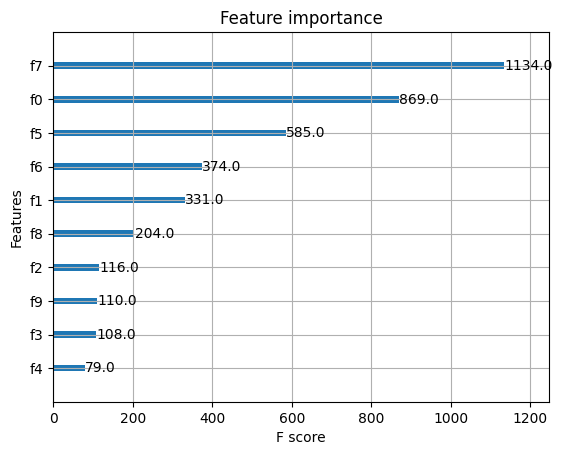

In [88]:

from xgboost import plot_importance
plot_importance(model)
plt.show()

In [89]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

f0 - Age, f1 - Job, f2 - marital status, f3- educational qualification, f4 - call type, f5 - day, f6 - mon, f7 -dur, f8 - number of calls, f9 - previous outcome f10 - y



# **Conclusions**

The top features which affects the conversion of customers are:

*   Duration

*   Age

*   Day
*   Month


*   Job




